In [77]:
# https://banexdevblog.wordpress.com/2014/06/23/a-quick-tutorial-about-the-fbx-ascii-format/

import json
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d  # for 3D plot

In [92]:
with open("../../data/cube2.json", 'r') as file:
    data = json.load(file)
type(data)

dict

In [3]:
data.keys()

dict_keys(['version', 'children'])

In [4]:
data['version']

7400

In [5]:
attributes = {}
for i,v in enumerate(data['children']):
    for key in v:
        if key in attributes:
            attributes[key].append(i)
        else:
            attributes[key] = [i]
attributes, len(data['children'])

({'name': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
  'children': [0, 4, 5, 6, 7, 8, 9, 10],
  'properties': [1, 2, 3]},
 11)

In [8]:
for i,v in enumerate(data['children']):
    print(i,v['name'])

0 FBXHeaderExtension
1 FileId
2 CreationTime
3 Creator
4 GlobalSettings
5 Documents
6 References
7 Definitions
8 Objects
9 Connections
10 Takes


In [10]:
print(data['children'][8].keys())

dict_keys(['name', 'children'])


In [14]:
for i,v in enumerate(data['children'][8]['children']):
    print(i,v['name'])

attributes = {}
for i,v in enumerate(data['children'][8]['children']):
    for key in v:
        if key in attributes:
            attributes[key].append(i)
        else:
            attributes[key] = [i]
attributes, len(data['children'][8]['children'])


0 Geometry
1 Geometry
2 Model
3 Model
4 Material
5 


({'name': [0, 1, 2, 3, 4, 5],
  'properties': [0, 1, 2, 3, 4],
  'children': [0, 1, 2, 3, 4]},
 6)

In [64]:
vertices = data['children'][8]['children'][0]['children'][2]['properties'][0]['value']
polygon_index = data['children'][8]['children'][0]['children'][3]['properties'][0]['value']
edges = data['children'][8]['children'][0]['children'][4]['properties'][0]['value']

In [73]:
def edge2connection(edge, polygon_index, points):
    """
    Represents a 3D point in space.
    
    # Example:
    >>> p1 = Point( -3.1 , 2.0 , 4.5 )
    >>> p1.x
    -3.1
    >>> p1.y = 3
    >>> p1
    Point(-3.1, 2.0, 4.5)
    >>> Point(1,2)
    TypeError: Point.__init__() missing 1 required positional argument: 'z'
    """
    def foo(x):
        return x if x > 0 else abs(x)-1
    return points[foo(polygon_index[edge])], points[foo(polygon_index[edge+1])]

points = [vertices[i*3:(i+1)*3] for i in range(len(vertices)//3)]
connections = [edge2connection(edge, polygon_index, points) for edge in edges]
connections[:5]

[([-1.0, -1.0, -1.0], [-1.0, 1.0, 1.0]),
 ([-1.0, 1.0, 1.0], [-1.0, -1.0, 1.0]),
 ([-1.0, -1.0, 1.0], [1.0, -1.0, 1.0]),
 ([1.0, -1.0, 1.0], [1.0, -1.0, -1.0]),
 ([1.0, -1.0, -1.0], [1.0, -1.0, 1.0])]

In [74]:
_from, _to = list(zip(*connections))
_from[:5], _to[:5]

(([-1.0, -1.0, -1.0],
  [-1.0, 1.0, 1.0],
  [-1.0, -1.0, 1.0],
  [1.0, -1.0, 1.0],
  [1.0, -1.0, -1.0]),
 ([-1.0, 1.0, 1.0],
  [-1.0, -1.0, 1.0],
  [1.0, -1.0, 1.0],
  [1.0, -1.0, -1.0],
  [1.0, -1.0, 1.0]))

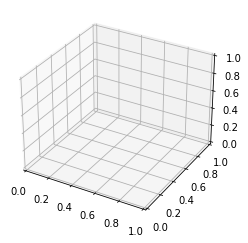

In [83]:
fig = plt.figure()
ax = plt.axes(projection='3d')

In [84]:
ax.scatter3D([point[0] for point in points], [point[1] for point in points], [point[2] for point in points], cmap='blue')

In [103]:
ax.plot3D([point[0] for point in points], [point[1] for point in points], [point[2] for point in points], 'blue')
plt.show()

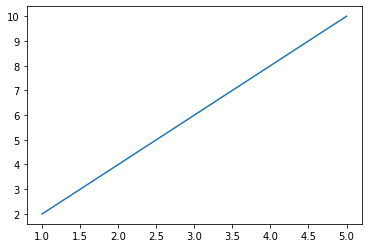

In [97]:
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

# Plot

plt.plot(x, y)

# Display

plt.show()

In [104]:
class Dog:
    def __init__(self, x: float, y: float):
        self.x = x
        self.y = y

Dog(1)

TypeError: Dog.__init__() missing 1 required positional argument: 'y'